In [1]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
from sklearn import model_selection

In [ ]:
# Y=PIC50

In [2]:
data=pd.read_csv('try.csv')

In [3]:
data

,pIC50,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,8.602,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,...,439.218115,64.771680,2.089409,15.471445,8.858910,3.406628,3011,47,4.666,166
1,8.125,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,...,467.249415,68.960024,2.089698,15.486947,8.863774,3.406648,3516,54,5.804,174
2,8.509,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,...,463.181729,68.748923,2.083301,18.011114,11.390412,3.406644,3542,52,2.964,176
3,8.409,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,...,467.249415,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,6.015,174
4,8.131,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,...,461.202465,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,4.462,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,6.132,0,1.8193,3.309852,177.6817,89.159790,24,24,73,43,...,598.166139,88.709996,2.063023,25.470481,21.946991,0.000000,7121,70,2.526,236
1970,5.851,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,...,570.134839,84.662088,2.064929,24.928962,21.405589,0.000000,6171,66,1.884,228
1971,7.721,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,...,570.134839,84.660642,2.064894,24.923083,21.400883,0.000000,6421,66,1.884,228
1972,7.886,0,1.3365,1.786232,125.5605,63.287860,18,18,51,31,...,436.098059,64.171346,2.070043,19.841924,16.326873,0.000000,2583,50,0.782,174


In [4]:
x = data.iloc[:,1:]
y = data.iloc[:,0]
y

0       8.602
1       8.125
2       8.509
3       8.409
4       8.131
        ...  
1969    6.132
1970    5.851
1971    7.721
1972    7.886
1973    7.569
Name: pIC50, Length: 1974, dtype: float64

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [6]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [7]:
predict = rf_model.predict(x_test)
features = x.columns
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({'Features':features,'Importance':feature_importances})
features_df.sort_values('Importance',inplace=True,ascending=False)

In [8]:
predict

array([6.049776  , 6.3938125 , 8.04929333, 8.3334695 , 7.94622667,
       7.04896333, 4.84506   , 5.64399833, 5.20446   , 8.84326298,
       4.96546   , 7.60759   , 5.05378   , 4.79532   , 4.92426   ,
       6.487755  , 6.22733   , 6.8029205 , 7.24651   , 5.99697   ,
       5.01446   , 6.0488    , 5.21598   , 6.64148   , 6.83436   ,
       7.73954083, 7.86298833, 4.83473   , 6.67760917, 7.07487233,
       7.00512   , 7.4438    , 6.06649   , 6.36719   , 6.74309   ,
       7.68986   , 7.386577  , 5.47198   , 6.85128   , 6.4775    ,
       6.827248  , 7.91129783, 5.62026   , 4.96868   , 5.83269   ,
       9.1473525 , 6.28036   , 8.58150267, 5.51848   , 6.33575   ,
       6.26387167, 7.01272   , 5.53779   , 6.1348    , 4.80281   ,
       7.31321   , 4.76758   , 7.72514   , 5.64408   , 6.21170533,
       6.83293367, 6.3589505 , 5.17269   , 7.995326  , 4.79978   ,
       4.76648   , 9.13269   , 6.3370825 , 6.30721   , 5.46093667,
       4.68725   , 7.217145  , 4.77173   , 6.01929667, 6.45974

In [9]:
features_df.iloc[:25]

,Features,Importance
439,MDEC-23,0.226729
10,nC,0.050424
54,C1SP2,0.043043
367,LipoaffinityIndex,0.029303
249,minHsOH,0.027101
419,nHBAcc,0.026267
286,minsOH,0.025212
354,maxssO,0.020974
38,BCUTc-1l,0.020275
453,MLFER_A,0.014562


In [10]:
y_test

778     5.979
757     6.708
1520    6.553
108     8.620
948     6.757
        ...  
201     6.275
585     7.023
30      8.357
403     6.089
693     5.164
Name: pIC50, Length: 395, dtype: float64

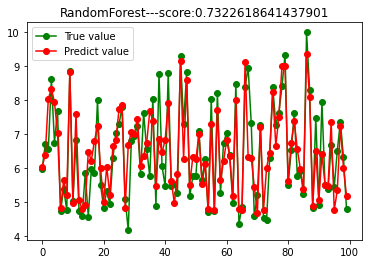

In [12]:
#预测结果可视化
score = rf_model.score(x_test, y_test) 
result = rf_model.predict(x_test) 
plt.figure() #只取前一百条可视化，因为数据太多了 
plt.plot(np.arange(100), y_test[:100], "go-", label="True value") 
plt.plot(np.arange(100), result[:100], "ro-", label="Predict value") 
plt.title(f"RandomForest---score:{score}") 
plt.legend(loc="best") 
plt.show()

In [131]:
importances = rf_model.feature_importances_
importances

array([4.45825100e-05, 5.39604950e-03, 1.85671679e-03, 6.62362930e-04,
       7.38665759e-04, 2.30308330e-04, 1.24387886e-04, 2.59616707e-04,
       5.48539054e-05, 3.73435974e-04, 5.72855979e-02, 1.53794091e-04,
       6.75231217e-05, 5.29098560e-05, 0.00000000e+00, 1.21367678e-05,
       4.24534514e-05, 6.67443274e-06, 1.50284969e-06, 1.50980058e-04,
       1.92358815e-03, 4.18402750e-03, 1.35062035e-02, 3.22676676e-03,
       3.29910951e-03, 1.42209673e-03, 7.46459209e-04, 3.96128150e-04,
       6.98377471e-04, 1.37976343e-03, 8.04594422e-04, 4.76248962e-04,
       7.55570783e-04, 7.41820918e-04, 1.43074207e-03, 1.63018080e-04,
       6.98307567e-04, 1.69645056e-03, 1.79252778e-02, 1.07389550e-02,
       2.78462759e-03, 3.68098204e-03, 1.19307051e-04, 2.74188081e-04,
       1.95581006e-04, 5.41438186e-04, 3.38390139e-04, 4.22736471e-04,
       1.05948952e-03, 1.44132307e-05, 5.56816803e-04, 2.67617961e-03,
       3.77023357e-05, 1.04460089e-06, 4.83710948e-02, 4.36266544e-04,
      

In [133]:
features_df.to_csv("PIC50变量贡献排序.csv")

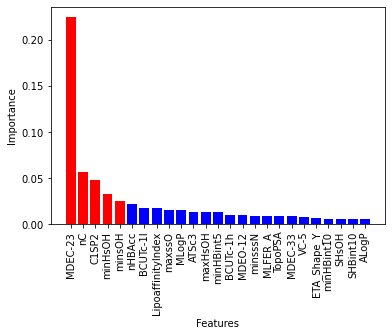

<Figure size 432x288 with 0 Axes>

In [167]:
from matplotlib import pyplot as plt

feat=features_df.iloc[:25]
index=list(feat.iloc[:,0])
values=list(feat.iloc[:,1])
color=["red","red","red","red","red",'blue','blue','blue','blue','blue','blue','blue','blue','blue',
       'blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue']
plt.bar(index,values,color=color)
plt.xticks(index,index, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
plt.savefig('重要性排序.jpg')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 69, 1)
plt.plot(t, t, 'r', t, t**2, 'b')
label = ['t', 't**2']
plt.legend(label, loc='upper left')
plt.savefig('./test2.jpg')
plt.show()


In [ ]:
#Y=Caco-2、CYP3A4、hERG、HOB、MN

In [7]:
df5=pd.read_csv('try分类变量.csv')

In [196]:
#预测对第一个分类变量的贡献程度
x = df5.iloc[:,5:]
y = df5.iloc[:,0] 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train,y_train)
#rf_model.score(x_test,y_test)
predict = rf_model.predict(x_test)
features = x.columns
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({'Features':features,'Importance':feature_importances})
features_df.sort_values('Importance',inplace=True,ascending=False)
#提取贡献程度大的前30个变量
aa1=features_df.iloc[0:30]
aa1

,Features,Importance
86,SP-1,0.035158
374,ETA_Alpha,0.031733
494,MW,0.027859
458,MLFER_L,0.027838
495,WTPT-1,0.026335
500,WPATH,0.025701
103,ECCEN,0.024171
3,AMR,0.023160
410,ETA_Eta_R_L,0.022936
85,SP-0,0.018813


In [202]:
score = accuracy_score(y_test,predict)
score  #计算准确率

0.9106239460370995

In [214]:
rf_model.score(x_test,y_test)

0.9123102866779089

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_blobs
import matplotlib as plt
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import precision_score, roc_curve, recall_score, f1_score, roc_auc_score, accuracy_score
import warnings

In [221]:
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

# accuracy
train_accuracy = rf_model.score(x_train, y_train)
test_accuracy = rf_model.score(x_test, y_test)
# precision
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
# recall
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
# f1
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [223]:
# auc 计算时，计算的应该是不同的概率画出来的曲线下的面积,而不是预测值对应的曲线下的面积
# 预测值 分类模型，应该全是0 或者 1 ，但是概率是类似于得分一样的值
# 根据资料貌似两种都行，都可以作为阈值来进行ROC曲线的绘制
y_train_pred = rf_model.predict_proba(x_train)[:, 1]
y_test_pred = rf_model.predict_proba(x_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

In [11]:
from IPython.core.interactiveshell import InteractiveShell  #使所有结果都输出
InteractiveShell.ast_node_interactivity = "all"

In [236]:
#训练集
train_accuracy
train_precision
train_recall
train_f1
train_auc
#测试集
test_accuracy
test_precision
test_recall
test_f1
test_auc

1.0

1.0

1.0

1.0

1.0

0.9055649241146712

0.8598130841121495

0.8761904761904762

0.8679245283018867

0.9716834514484646

In [228]:
def draw_roc_curve(train_pre_proba, test_pre_proba, train_auc, test_auc, model_name):
    fpr, tpr, roc_auc = train_pre_proba
    test_fpr, test_tpr, test_roc_auc = test_pre_proba

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % train_auc)
    plt.plot(test_fpr, test_tpr, color='red',
             lw=lw, label='ROC curve (area = %0.2f)' % test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc example ' + model_name)
    plt.legend(loc="lower right")
    plt.show()

TypeError: can only concatenate str (not "RandomForestClassifier") to str

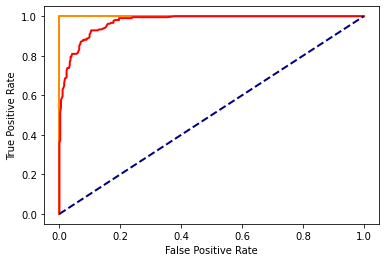

In [235]:

y_train_pred = rf_model.predict_proba(x_train)[:, 1]
y_test_pred = rf_model.predict_proba(x_test)[:, 1]

train_roc = roc_curve(y_train, y_train_pred)
test_roc = roc_curve(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

draw_roc_curve(train_roc, test_roc, train_auc, test_auc, rf_model)


In [237]:
#预测对第二个分类变量的贡献程度
x = df5.iloc[:,5:]
y = df5.iloc[:,1] 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train,y_train)

predict = rf_model.predict(x_test)
features = x.columns
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({'Features':features,'Importance':feature_importances})
features_df.sort_values('Importance',inplace=True,ascending=False)
#提取贡献程度大的前30个变量
aa2=features_df.iloc[0:30]
aa2

RandomForestClassifier()

,Features,Importance
89,SP-4,0.043803
93,VP-0,0.025554
408,ETA_Eta_L,0.022600
99,VP-6,0.021520
495,WTPT-1,0.021461
31,ATSp2,0.020169
91,SP-6,0.019720
410,ETA_Eta_R_L,0.019719
95,VP-2,0.019600
98,VP-5,0.018382


1.0

1.0

1.0

1.0

1.0

0.9578414839797639

0.9730337078651685

0.9708520179372198

0.9719416386083053

0.9894527317653519

TypeError: can only concatenate str (not "RandomForestClassifier") to str

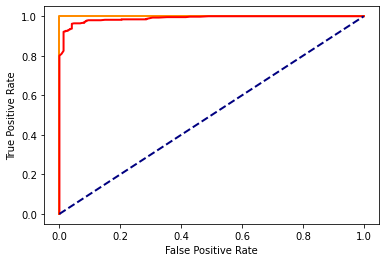

In [238]:
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

# accuracy
train_accuracy = rf_model.score(x_train, y_train)
test_accuracy = rf_model.score(x_test, y_test)
# precision
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
# recall
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
# f1
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# auc 计算时，计算的应该是不同的概率画出来的曲线下的面积,而不是预测值对应的曲线下的面积
# 预测值 分类模型，应该全是0 或者 1 ，但是概率是类似于得分一样的值
# 根据资料貌似两种都行，都可以作为阈值来进行ROC曲线的绘制
y_train_pred = rf_model.predict_proba(x_train)[:, 1]
y_test_pred = rf_model.predict_proba(x_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

#训练集
train_accuracy
train_precision
train_recall
train_f1
train_auc
#测试集
test_accuracy
test_precision
test_recall
test_f1
test_auc


y_train_pred = rf_model.predict_proba(x_train)[:, 1]
y_test_pred = rf_model.predict_proba(x_test)[:, 1]

train_roc = roc_curve(y_train, y_train_pred)
test_roc = roc_curve(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

draw_roc_curve(train_roc, test_roc, train_auc, test_auc, rf_model)

In [239]:
#预测对第三个分类变量的贡献程度
x = df5.iloc[:,5:]
y = df5.iloc[:,2] 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train,y_train)

predict = rf_model.predict(x_test)
features = x.columns
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({'Features':features,'Importance':feature_importances})
features_df.sort_values('Importance',inplace=True,ascending=False)
#提取贡献程度大的前30个变量
aa3=features_df.iloc[0:30]
aa3

RandomForestClassifier()

,Features,Importance
103,ECCEN,0.027783
94,VP-1,0.026120
4,apol,0.025406
86,SP-1,0.023997
7,nAtom,0.020795
428,Kier3,0.020506
427,Kier2,0.020102
102,CrippenMR,0.018590
500,WPATH,0.017126
458,MLFER_L,0.017069


1.0

1.0

1.0

1.0

1.0

0.8988195615514334

0.8857938718662952

0.9436201780415431

0.9137931034482759

0.9672663204747773

TypeError: can only concatenate str (not "RandomForestClassifier") to str

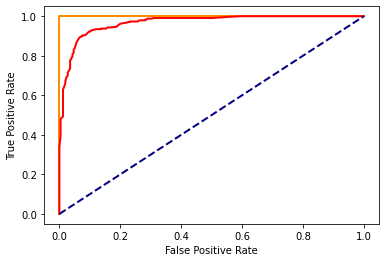

In [240]:
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

# accuracy
train_accuracy = rf_model.score(x_train, y_train)
test_accuracy = rf_model.score(x_test, y_test)
# precision
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
# recall
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
# f1
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# auc 计算时，计算的应该是不同的概率画出来的曲线下的面积,而不是预测值对应的曲线下的面积
# 预测值 分类模型，应该全是0 或者 1 ，但是概率是类似于得分一样的值
# 根据资料貌似两种都行，都可以作为阈值来进行ROC曲线的绘制
y_train_pred = rf_model.predict_proba(x_train)[:, 1]
y_test_pred = rf_model.predict_proba(x_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

#训练集
train_accuracy
train_precision
train_recall
train_f1
train_auc
#测试集
test_accuracy
test_precision
test_recall
test_f1
test_auc


y_train_pred = rf_model.predict_proba(x_train)[:, 1]
y_test_pred = rf_model.predict_proba(x_test)[:, 1]

train_roc = roc_curve(y_train, y_train_pred)
test_roc = roc_curve(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

draw_roc_curve(train_roc, test_roc, train_auc, test_auc, rf_model)

In [251]:
#预测对第四个分类变量的贡献程度
x = df5.iloc[:,5:]
y = df5.iloc[:,3] 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train,y_train)

predict = rf_model.predict(x_test)
features = x.columns
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({'Features':features,'Importance':feature_importances})
features_df.sort_values('Importance',inplace=True,ascending=False)
#提取贡献程度大的前30个变量
aa4=features_df.iloc[0:30]
aa4

RandomForestClassifier()

,Features,Importance
38,BCUTc-1l,0.054387
249,minHsOH,0.017350
453,MLFER_A,0.016620
352,maxsOH,0.014162
286,minsOH,0.013554
220,SsOH,0.013507
183,SHsOH,0.013015
117,nHsOH,0.011322
315,maxHsOH,0.010920
365,hmin,0.007592


1.0

1.0

1.0

1.0

1.0

0.8701517706576728

0.7851851851851852

0.6883116883116883

0.7335640138408306

0.924503742271396

TypeError: can only concatenate str (not "RandomForestClassifier") to str

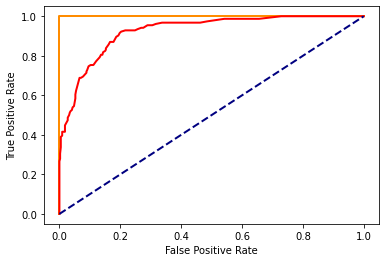

In [252]:
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

# accuracy
train_accuracy = rf_model.score(x_train, y_train)
test_accuracy = rf_model.score(x_test, y_test)
# precision
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
# recall
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
# f1
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# auc 计算时，计算的应该是不同的概率画出来的曲线下的面积,而不是预测值对应的曲线下的面积
# 预测值 分类模型，应该全是0 或者 1 ，但是概率是类似于得分一样的值
# 根据资料貌似两种都行，都可以作为阈值来进行ROC曲线的绘制
y_train_pred = rf_model.predict_proba(x_train)[:, 1]
y_test_pred = rf_model.predict_proba(x_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

#训练集
train_accuracy
train_precision
train_recall
train_f1
train_auc
#测试集
test_accuracy
test_precision
test_recall
test_f1
test_auc


y_train_pred = rf_model.predict_proba(x_train)[:, 1]
y_test_pred = rf_model.predict_proba(x_test)[:, 1]

train_roc = roc_curve(y_train, y_train_pred)
test_roc = roc_curve(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

draw_roc_curve(train_roc, test_roc, train_auc, test_auc, rf_model)

In [13]:
#预测对第五个分类变量的贡献程度
x = df5.iloc[:,5:]
y = df5.iloc[:,4] 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train,y_train)

predict = rf_model.predict(x_test)
features = x.columns
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({'Features':features,'Importance':feature_importances})
features_df.sort_values('Importance',inplace=True,ascending=False)
#提取贡献程度大的前30个变量
aa5=features_df.iloc[0:30]
aa5

RandomForestClassifier()

,Features,Importance
499,WTPT-5,0.031689
396,ETA_BetaP_s,0.028542
422,nHBAcc_Lipinski,0.026310
497,WTPT-3,0.023132
491,TopoPSA,0.021595
385,ETA_dEpsilon_C,0.020161
419,nHBAcc,0.019005
381,ETA_Epsilon_4,0.018213
383,ETA_dEpsilon_A,0.014497
330,maxsCH3,0.014463


In [15]:
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

# accuracy
train_accuracy = rf_model.score(x_train, y_train)
test_accuracy = rf_model.score(x_test, y_test)
# precision
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
# recall
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
# f1
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# auc 计算时，计算的应该是不同的概率画出来的曲线下的面积,而不是预测值对应的曲线下的面积
# 预测值 分类模型，应该全是0 或者 1 ，但是概率是类似于得分一样的值
# 根据资料貌似两种都行，都可以作为阈值来进行ROC曲线的绘制
y_train_pred = rf_model.predict_proba(x_train)[:, 1]
y_test_pred = rf_model.predict_proba(x_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

#训练集
train_accuracy
train_precision
train_recall
train_f1
train_auc
#测试集
test_accuracy
test_precision
test_recall
test_f1
test_auc


y_train_pred = rf_model.predict_proba(x_train)[:, 1]
y_test_pred = rf_model.predict_proba(x_test)[:, 1]

train_roc = roc_curve(y_train, y_train_pred)
test_roc = roc_curve(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

draw_roc_curve(train_roc, test_roc, train_auc, test_auc, rf_model)

1.0

1.0

1.0

1.0

1.0

0.954468802698145

0.9609544468546638

0.9800884955752213

0.9704271631982475

0.9832972447122325

NameError: name 'draw_roc_curve' is not defined

In [16]:
y_train

110     1
1117    1
764     0
1260    1
1454    0
       ..
1791    1
1096    1
1932    1
235     1
1061    0
Name: MN, Length: 1381, dtype: int64

In [17]:
predict = rf_model.predict(x_test)
predict

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [181]:
aa1.to_csv("aa1.csv")
aa2.to_csv("aa2.csv")
aa3.to_csv("aa3.csv")
aa4.to_csv("aa4.csv")
aa5.to_csv("aa5.csv")

In [ ]:
#冰冰

In [29]:
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [33]:
forest.fit(x_train, y_train.astype('int'))
importances = forest.feature_importances_
importances



array([3.21131004e-04, 4.78563460e-03, 4.47522690e-03, 4.99421381e-03,
       3.86789622e-03, 1.03864609e-03, 1.19093357e-03, 2.49009524e-03,
       2.00325820e-03, 1.93625014e-03, 4.14102701e-03, 2.26111913e-03,
       1.21686947e-03, 3.80328102e-04, 1.17664758e-06, 3.49963549e-04,
       2.10306676e-04, 1.66280029e-04, 1.46158000e-06, 5.57126804e-04,
       5.51030322e-03, 6.37558780e-03, 4.86987851e-03, 5.66995840e-03,
       5.32143588e-03, 2.48856858e-03, 2.73178530e-03, 2.83125506e-03,
       3.21702592e-03, 3.58125537e-03, 3.70413640e-03, 3.53958378e-03,
       3.50058137e-03, 3.81665973e-03, 4.56899148e-03, 1.00842144e-03,
       1.40267017e-03, 2.33700650e-03, 8.52879189e-03, 5.93498295e-03,
       4.02994988e-03, 5.04115117e-03, 2.19012087e-03, 2.36544826e-03,
       2.06172764e-03, 1.99012742e-03, 1.76755018e-03, 9.79920636e-04,
       1.13178589e-03, 1.43278866e-04, 1.42123918e-03, 2.99739771e-03,
       1.23742718e-04, 8.34671286e-05, 3.36547910e-03, 2.05056079e-03,
      

In [34]:
indices = np.argsort(importances)[::-1] #[::-1]表示将各指标按权重大小进行排序输出
indices

array([ 38, 367, 315, 439, 183, 249, 220, 453, 497, 352,  21, 419, 499,
        39, 502,  23,  20, 286,  24, 491, 365, 238, 396, 498,  41,   3,
        22, 492,   1, 354, 101, 454,  34, 103, 236, 368, 366,   2, 364,
       304, 441, 302, 170, 433, 369, 173, 372, 455, 391, 495, 203,  77,
       243, 428,  84, 339,  10, 371, 207, 239, 335,  40,  81,  87, 192,
       370, 385, 405, 273,   4, 381, 373, 432, 244, 272,  83, 500,  33,
        90, 269,  80, 438,  75, 329, 324, 172, 197, 456, 363,  65,  30,
        82,  92, 100,  70, 427, 407,  86, 305,  79, 258,  89, 382,  29,
        98, 263,  99, 416,  31, 496, 422, 178,  32,  93, 248, 406, 418,
        91, 378, 379, 410, 383, 404, 445, 309,  54,  88, 222, 390, 412,
       386, 409, 332, 182,  97, 287, 411,  64,  71, 266,  28, 177, 374,
       102,  85, 283, 206, 326,  73, 117, 314,  94, 414, 458, 388, 154,
       415, 349, 426, 264,  69, 387,  51, 288, 330, 457,  96, 362, 200,
       400, 384,  95, 413, 403, 221,  27, 375, 494, 402, 408, 41

In [36]:
feat_labels = data.columns[1:]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) BCUTc-1l                       0.008529
 2) LipoaffinityIndex              0.007575
 3) maxHsOH                        0.007204
 4) MDEC-23                        0.007020
 5) SHsOH                          0.006853
 6) minHsOH                        0.006773
 7) SsOH                           0.006767
 8) MLFER_A                        0.006742
 9) WTPT-3                         0.006488
10) maxsOH                         0.006459
11) ATSc2                          0.006376
12) nHBAcc                         0.006182
13) WTPT-5                         0.005969
14) BCUTc-1h                       0.005935
15) XLogP                          0.005832
16) ATSc4                          0.005670
17) ATSc1                          0.005510
18) minsOH                         0.005361
19) ATSc5                          0.005321
20) TopoPSA                        0.005268
21) hmin                           0.005256
22) minHBa                         0.005135
23) ETA_BetaP_s                 

500) nP                             0.000001
501) minssssNp                      0.000001
502) SssssNp                        0.000001
503) nssssNp                        0.000000
504) maxssssNp                      0.000000
